In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df_train = pd.read_csv('santander-customer-satisfaction (1)\\train.csv')
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [59]:
# our data is df_train
x = df_train.drop('TARGET', axis='columns')
y = df_train['TARGET']
x.shape

(76020, 370)

In [60]:
y.shape

(76020,)

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [62]:
x_train.shape

(60816, 370)

In [63]:
y_train.shape

(60816,)

In [64]:
x_test.shape

(15204, 370)

In [65]:
y_test.shape

(15204,)

In [66]:
# smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x_train,y_train)

In [67]:
x_sm.shape

(116788, 370)

In [68]:
y_sm.shape

(116788,)

In [51]:
# skip this code
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scl = ss.fit_transform(x_sm)

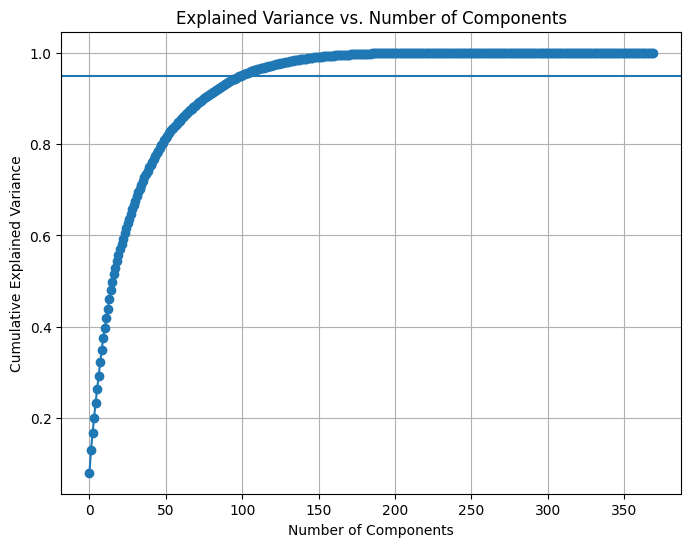

In [12]:
# skip this code.
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA()
pca.fit(x_scl)

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=0.95)
plt.grid(True)
plt.show()

In [69]:
# if anyone asking about how to get 160, then you can run above code 
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
# pca = PCA(0.95)
x_pca = pca.fit_transform(x_sm)
x_pca.shape
# o.90 which returns the 90% usefull features and pca is convert values into scaler

(116788, 100)

In [70]:
y_sm.shape

(116788,)

In [73]:
# scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scl = ss.fit_transform(x_pca)

In [74]:
# x_scl, y_sm

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_scl, y_sm)

RandomForestClassifier(n_estimators=200)

In [76]:
# # smote
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(sampling_strategy='minority')
# x_sm1, y_sm1 = smote.fit_resample(x_test,y_test)a

In [80]:
# pca
# if anyone asking about how to get 160, then you can run above code 
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
# pca = PCA(0.95)
x_pca1 = pca.fit_transform(x_test)
x_pca.shape
# o.90 which returns the 90% usefull features and pca is convert values into scaler

(116788, 100)

In [81]:
# scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scl1 = ss.fit_transform(x_pca1)

In [82]:
rfc.score(x_scl1, y_test)
# here again we need to smote, pca and scaling on x_test

0.9614575111812681

In [92]:
from sklearn.metrics import accuracy_score
y_test_pred = rfc.predict(x_scl1)
ac_s = accuracy_score(y_test, y_test_pred)
print(f'Accuracy : {ac_s}')

Accuracy : 0.9614575111812681


## Now our model is ready

In [93]:
import pandas as pd
df_test = pd.read_csv(r'C:\Users\KU_0373\Downloads\santander-customer-satisfaction (1)\test.csv')
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [102]:
# pca
# if anyone asking about how to get 160, then you can run above code 
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
# pca = PCA(0.95)
x_pca1 = pca.fit_transform(df_test)
x_pca1.shape
# o.90 which returns the 90% usefull features and pca is convert values into scaler

(75818, 100)

In [103]:
# scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scl2 = ss.fit_transform(x_pca1)
x_scl2.shape

(75818, 100)

In [105]:
from sklearn.metrics import accuracy_score
y_test_pred = rfc.predict(x_scl2)
y_test_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [107]:
count_0 = 0
count_1 = 0
for i in y_test_pred:
    if i == 1:
        count_1 += 1
    else:
        count_0 += 1
print(f'count_1 is {count_1}')
print(f'count_0 is {count_0}')

count_1 is 10052
count_0 is 65766


In [108]:
import pandas as pd
# Create DataFrame
df_final_sub = pd.DataFrame({'ID': df_test['ID'], 'TARGET': y_test_pred})

# Show the DataFrame
df_final_sub.head()

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0


In [109]:
df_final_sub.to_csv('df_final_second.csv', index=False)

## NEW

In [162]:
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [163]:
# our data is df_train
x = df_train.drop('TARGET', axis='columns')
y = df_train['TARGET']
x.shape

(76020, 370)

In [164]:
y.shape

(76020,)

In [165]:
# smote
# smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)
x_sm.shape

(146024, 370)

In [166]:
y_sm.shape
# now our data is balanced

(146024,)

In [169]:
# we remove col which having 99.5 cols
count_c = 0
list = []
for i in x_sm.columns:
    count_0 = 0
    count_i = 0
    for j in x_sm[i]:
        count_i += 1
        if j == 0:
            count_0 += 1
    # print(f'{df_train[i]} =  {count_0}') 
    tot = count_0 / count_i * 100
    if int(tot) == 100:
        list += [i]
        count_c += 1
print(count_c)
# these are deleted features.
x_sm1 = x_sm.drop(list, axis=1)
x_sm1.head()

34


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [170]:
x_sm1.shape

(146024, 336)

In [171]:
y_sm.shape

(146024,)

In [172]:
# scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scl = ss.fit_transform(x_sm1)

In [173]:
# split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scl, y_sm, test_size=0.2, random_state=30)

In [174]:
# rfc
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [175]:
rfc.score(x_test, y_test)

0.9656223249443588

In [176]:
y_test_pred = rfc.predict(x_test)

In [177]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.9656223249443588

## test_data

In [178]:
import pandas as pd
df_test = pd.read_csv(r'C:\Users\KU_0373\Downloads\santander-customer-satisfaction (1)\test.csv')
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [180]:
# delete col
# we remove col which having 99.5 cols
count_c = 0
list = []
for i in df_test.columns:
    count_0 = 0
    count_i = 0
    for j in df_test[i]:
        count_i += 1
        if j == 0:
            count_0 += 1
    # print(f'{df_train[i]} =  {count_0}') 
    tot = count_0 / count_i * 100
    if int(tot) == 100:
        list += [i]
        count_c += 1
print(count_c)
# these are deleted features.
x_sm2 = df_test.drop(list, axis=1)
x_sm2.head()

45


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73
